# Simulated Annealing

Simulated annealing is stochastic opimization technique based on monte carlo methods.  If we remember back to our Ising model, we remember that lower temperatures moved to towards the low energy values while high temperatures sampled more of the domain (with a slight bias towards lower energy points).  To give a better example of why simulated annealing is global scheme, lets look at a potential commonly used in phase field methods
\begin{equation}
U = a(x-2)^2(x+2)^2+bx
\end{equation}
where $b$ is a driving force which drives phase transitions and $a$ is the Landau energy which determines the energy barrier between the two phases.  For our example, we will let $b=3$ and $a = 10$.  Now, we aren't looking at studying phase transformations here, just looking to find the lowest minima state. 

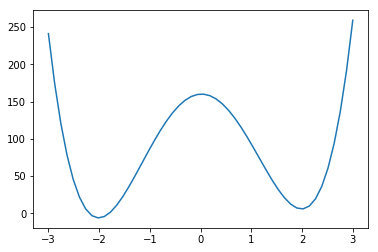

In [3]:
import numpy
import matplotlib.pyplot as plt

x = numpy.linspace(-3,3)
y = 10*(x-2)**2*(x+2)**2+3*x
plt.plot(x,y)
plt.show()


In [5]:
import scipy

def energy(x):
    return 10*(x-2)**2*(x+2)**2+3*x

result = scipy.optimize.minimize(energy, 1)
print(result.x)

[1.99055823]


$p(x) \propto e^{-f(x)/T}$

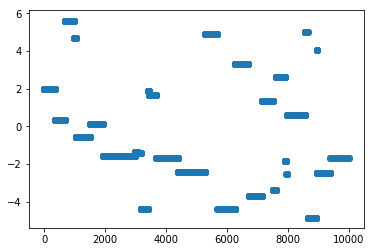

-1.7058061963275075


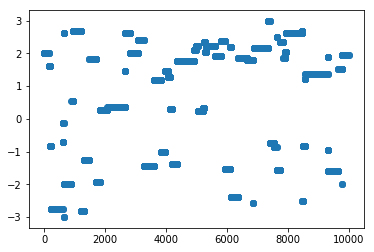

1.939449218541041


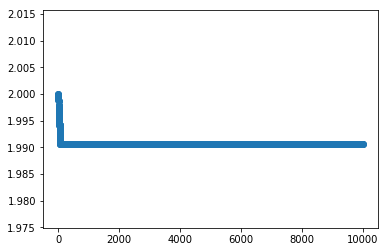

1.9905581867644417


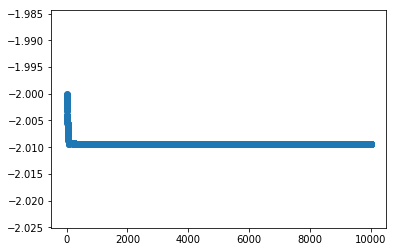

-2.0093096302405504


In [9]:
def Markov(x0= 2.0, T=3.0, nsim = 10000):
    eLast = energy(x0)
    #print(T)
    #print(x0)
    xx = []
    for i in range(nsim):
        xtest = x0 + numpy.random.randn()*numpy.sqrt(T*1e3)
        alpha = numpy.random.rand()
        eTest = energy(xtest)
        #print(eTest, eLast, numpy.exp(-(eLast-eTest)/T), alpha)
        if numpy.exp((eLast-eTest)/T) > alpha:
            eLast = eTest
            x0 = xtest
        xx.append(x0)
    plt.figure()
    plt.scatter(numpy.asarray(range(len(xx))),numpy.asarray(xx))
    plt.show()
    return x0, xx

print(Markov(T=5000)[0])

print(Markov(T=100)[0])

print(Markov(x0 = 2.0, T= 1e-10)[0])

print(Markov(x0 = -2.0, T=1e-10)[0])

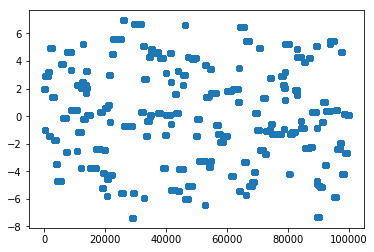

10000 0.08741570013964539


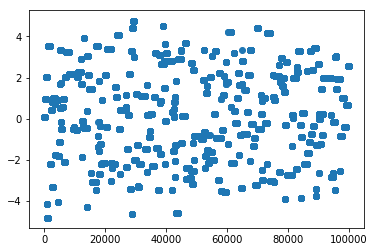

1000 2.538858969029482


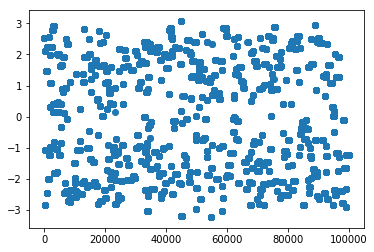

100 -1.2277276226418696


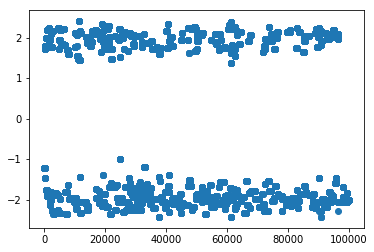

10 -2.001180182168352


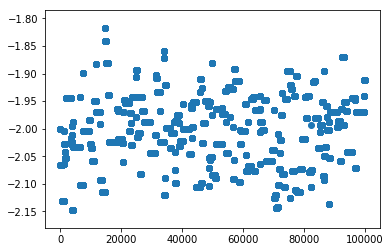

1 -1.9108856257749545


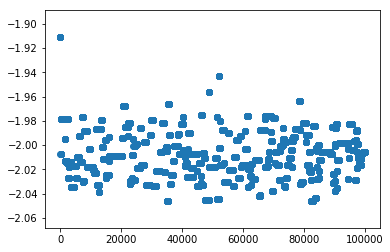

0.1 -2.0055554547059797


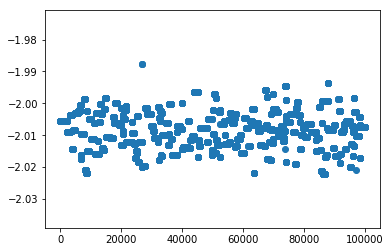

0.01 -2.007308570329626


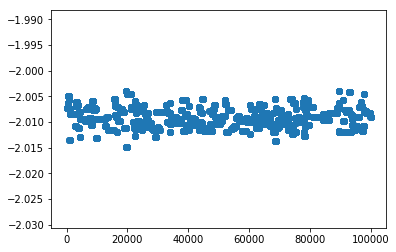

0.001 -2.0090559218127075


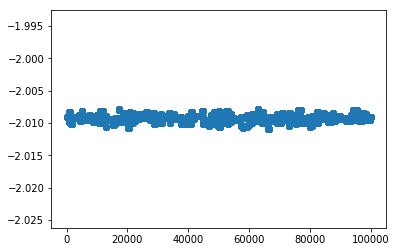

0.0001 -2.0091293171250992


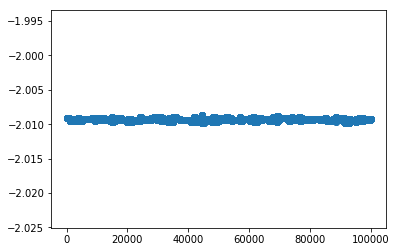

1e-05 -2.0091817579733267


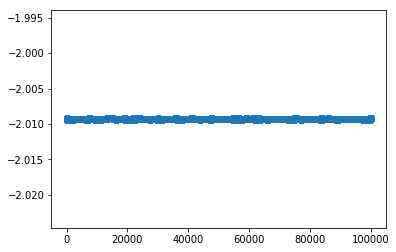

1e-06 -2.009268158884874


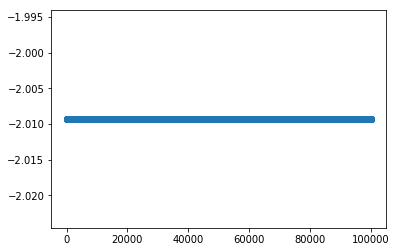

1e-07 -2.009290841272186


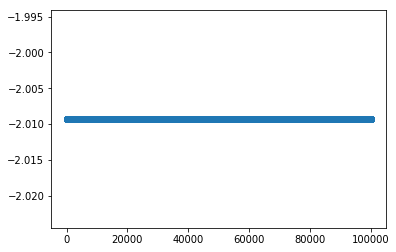

1e-08 -2.00930112561463


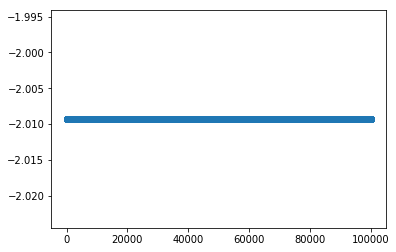

1e-09 -2.009307949416132


In [10]:
#Simulated Annealing high temperatures get out of local minima, low temperatures hone in on the minima
x0 = 2
for i in range(-4,10):
    T = 10**-i
    x0 = Markov(x0 = x0, T=T, nsim=100000)[0]
    print(T, x0)

In [12]:
results = scipy.optimize.basinhopping(energy, 2)
print(results)

                        fun: 5.985870956335865
 lowest_optimization_result:       fun: 5.985870956335865
 hess_inv: array([[0.00317216]])
      jac: array([2.50339508e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.99055825])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1965
                        nit: 100
                       njev: 655
                          x: array([1.99055825])
